## Reading in data and taking a quick look at some charts

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Read in csv
df = pd.read_csv("Austin_Animal_Center_Outcomes.csv")

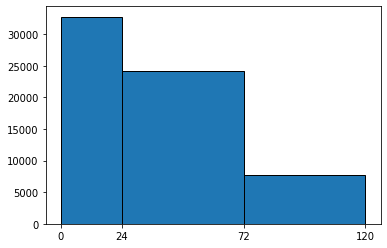

In [4]:
# Take a quick peak at charts

# Top Breeds
# df['Breed'].value_counts().head(20).plot.bar()

# Top Outcome_Types
# df['Breed'].value_counts().head(20).plot.bar()

# Age chart
bins= [0,24,72,120]
plt.hist(df.Age_month, bins=bins, edgecolor="k")
plt.xticks(bins)
plt.show()

In [5]:
df.head()

,Animal_ID,Name,DateTime,MonthYear,Date_of_Birth,Outcome_Type,Outcome_Subtype,Fixed,Sex,Age_numeric,Age_time,Age_month,Breed,Color
0,A805930,*Rachel,11/8/2019 18:37,11/8/2019 18:37,9/11/2019,Adoption,Foster,Spayed,Female,1,month,1.000000,Border Collie Mix,Chocolate/White
1,A705114,NaN,06/13/2015 03:47:00 PM,06/13/2015 03:47:00 PM,6/11/2015,Transfer,Partner,Intact,Male,2,days,0.066667,German Shepherd Mix,Brown
2,A680143,NaN,05/31/2014 11:21:00 AM,05/31/2014 11:21:00 AM,05/29/2014,Transfer,Partner,Intact,Male,2,days,0.066667,Labrador Retriever Mix,Black/White
3,A670236,NaN,1/5/2014 15:12,1/5/2014 15:12,1/3/2014,Transfer,Partner,Unknown,NaN,2,days,0.066667,Pit Bull Mix,Blue/White
4,A811594,NaN,1/6/2020 17:09,1/6/2020 17:09,1/4/2020,Transfer,Partner,Intact,Female,2,days,0.066667,Dachshund Mix,Brown


In [6]:
df.shape

(66804, 14)

## Cleaning
1. Drop unnessary columns
2. Drop rows where "Outcome_Type" is null
3. Drop rows where "Outcome_Type" is Return_To_Owner

In [7]:
# Quick check for missing values
df.apply(lambda x: sum(x.isnull()/len(df)))

Animal_ID          0.000000
Name               0.169496
DateTime           0.000000
MonthYear          0.000000
Date_of_Birth      0.000000
Outcome_Type       0.000000
Outcome_Subtype    0.688567
Fixed              0.000015
Sex                0.005673
Age_numeric        0.000000
Age_time           0.000000
Age_month          0.000000
Breed              0.000000
Color              0.000000
dtype: float64

In [8]:
# Drop unnessary columns
df2 = df.drop(columns=['Animal_ID', 'Name', 'DateTime', 'MonthYear', 'Date_of_Birth', 'Outcome_Subtype', 
                       'Age_numeric', 'Age_time' ])

In [9]:
df2.shape
# df2.head()

(66804, 6)

In [10]:
# Drop rows where Outcome_Type is null

df2 = df2.loc[df2.Outcome_Type.notna(), ["Outcome_Type", "Fixed", "Sex", "Age_month", "Breed" ,"Color"]]

In [11]:
# Check for more nulls
df2.head()
df2.apply(lambda x: sum(x.isnull()/len(df2)))
df2.shape

(66804, 6)

In [12]:
# Have to fix the following columns "Fixed" and "Sex"
df2 = df2.dropna(axis=0, subset=["Fixed", "Sex"])

In [13]:
# Verify that nulls from "Fixed" and "Sex" have been dropped
df2.apply(lambda x: sum(x.isnull()/len(df2)))
df2.shape

(66425, 6)

In [14]:
df2.groupby('Outcome_Type').count()

,Fixed,Sex,Age_month,Breed,Color
Outcome_Type,,,,,
Adoption,31395,31395,31395,31395,31395
Died,209,209,209,209,209
Disposal,22,22,22,22,22
Euthanasia,1694,1694,1694,1694,1694
Missing,29,29,29,29,29
Return to Owner,18400,18400,18400,18400,18400
Rto-Adopt,498,498,498,498,498
Transfer,14178,14178,14178,14178,14178


In [15]:
# Drop all rows 'Return to Owner' ???  

df3 = df2.drop(df2[df2.Outcome_Type == "Return to Owner"].index)

In [16]:
# Verify shape
df3.shape

(48025, 6)

In [17]:
# Verify group by counts
df3.groupby('Outcome_Type').count()

,Fixed,Sex,Age_month,Breed,Color
Outcome_Type,,,,,
Adoption,31395,31395,31395,31395,31395
Died,209,209,209,209,209
Disposal,22,22,22,22,22
Euthanasia,1694,1694,1694,1694,1694
Missing,29,29,29,29,29
Rto-Adopt,498,498,498,498,498
Transfer,14178,14178,14178,14178,14178


In [18]:
# Anymore missing values before we move on?  If zero, then we are good.
df3.apply(lambda x: sum(x.isnull()/len(df3)))

Outcome_Type    0.0
Fixed           0.0
Sex             0.0
Age_month       0.0
Breed           0.0
Color           0.0
dtype: float64

## Add new features?
1. New feature? - Mixed/Pure Breed?
2. New feature? - Single color/Multi color?
3. Color -  We have 333 unique color combinations. Hot encoding "Color" will create additional X features if we didn't do anything.  This would be unlikely to create a good performing model.
    *  Option 1 - We take any values occurring fewer than 300 times and places them into the “other” label. We use this to create a new feature called “Top_colors”.  Doing this would reduce 333 unique colors to 30 unique values
    *  Option 2 - Split to primary color vs secondary color?
4. Breeds - Hot encoding "Breed" will create additional 1,380 new features if we didn't do anything.  

#### Handling Color - Option 1 (Selecting Top_Colors)
* How does option1 effect RF/LogReg models?


In [ ]:
# Check top colors
color_counts = df3['Color'].value_counts()
print(color_counts)
print(df3['Color'].nunique())

# # Handling "Color" Option 1
# color_others = set(color_counts[color_counts < 300].index)
# df3['Top_colors'] = df3['Color'].replace(list(color_others), 'Others')
# print(df3['Top_colors'].nunique())

In [ ]:
# Drop Color column?
df3.loc[150:160, :]

#### Handling Color - Option 2 (Split and have intaker check all colors that apply)
* How does option2 effect RF/LogReg models?

## Changing to Binary Outcome - Take the dog or Don't take the dog?
* Positive Outcome is Adoption - Take in the dog
* Negative Outcome is a combination of Transfer, Euthanized and Death categories - Don't take in the dog

In [19]:
# Create new BINARY_OUTCOME column and set to 0

df3["Binary_outcome"]=0
df3.head()

,Outcome_Type,Fixed,Sex,Age_month,Breed,Color,Binary_outcome
0,Adoption,Spayed,Female,1.000000,Border Collie Mix,Chocolate/White,0
1,Transfer,Intact,Male,0.066667,German Shepherd Mix,Brown,0
2,Transfer,Intact,Male,0.066667,Labrador Retriever Mix,Black/White,0
4,Transfer,Intact,Female,0.066667,Dachshund Mix,Brown,0
6,Transfer,Intact,Female,0.066667,Pit Bull Mix,Chocolate/White,0


In [20]:
# Find rows containing word "Adoption" and set to 1 (for Positive Outcome)
# All other rows will be 0 (for Negative Outcome)

df3.loc[df3["Outcome_Type"].str.contains("Adoption"), "Binary_outcome"] = 1

In [21]:
df3.loc[200:300, :]

,Outcome_Type,Fixed,Sex,Age_month,Breed,Color,Binary_outcome
200,Transfer,Intact,Female,0.2,Dachshund,Tan,0
201,Transfer,Intact,Male,0.2,Dachshund,Tan,0
205,Transfer,Intact,Female,0.2,German Shepherd/Rottweiler,Brown/Black,0
206,Transfer,Intact,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle,0
208,Transfer,Intact,Female,0.2,Rat Terrier Mix,White,0
...,...,...,...,...,...,...,...
296,Transfer,Intact,Female,1.0,German Shepherd Mix,Brown,0
297,Transfer,Intact,Male,1.0,Australian Cattle Dog Mix,Cream/Brown Merle,0
298,Adoption,Spayed,Female,1.0,Labrador Retriever Mix,Tan,1
299,Transfer,Intact,Male,1.0,Jack Russell Terrier Mix,Sable,0


## Perform get_dummies  ( Changing categorical values to numeric values )

In [22]:
# Passing get_dummies on all columns except Outcome_rating and Pet_ageMonths
df4 = pd.get_dummies(data=df3, columns=['Fixed', 'Sex', 'Breed', 'Color', 'Fixed'])

In [23]:
df4.head()

,Outcome_Type,Age_month,Binary_outcome,Fixed_Intact,Fixed_Neutered,Fixed_Spayed,Sex_Female,Sex_Male,Breed_Affenpinscher Mix,Breed_Afghan Hound/Labrador Retriever,...,Color_Yellow Brindle,Color_Yellow Brindle/Blue,Color_Yellow Brindle/White,Color_Yellow/Black,Color_Yellow/Cream,Color_Yellow/Tan,Color_Yellow/White,Fixed_Intact,Fixed_Neutered,Fixed_Spayed
0,Adoption,1.000000,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Transfer,0.066667,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Transfer,0.066667,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Transfer,0.066667,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,Transfer,0.066667,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
# Drop these columns as they are duplicates
df4 = df4.drop(columns=['Sex_Female'])

In [25]:
df4.shape

(48025, 2353)

In [26]:
# Define X and y
X = df4.drop(['Outcome_Type', 'Binary_outcome'], axis="columns")
y = df4[['Binary_outcome']]

In [27]:
X.shape

(48025, 2351)

In [28]:
y.shape

(48025, 1)

## Random Forest model


In [29]:
# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
# Import, initialize, fit and predict
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 10) 
rf_model.fit(X_train, y_train)
predict_y_test = rf_model.predict(X_test)

C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [31]:
# Validate - run accuracy score
from sklearn import metrics
print("Accuracy score: ", metrics.accuracy_score(y_test, predict_y_test))

Accuracy score:  0.7778795702506871


In [50]:
# RF Feature importance?
feature_list = list(X.columns)
feature_importance = pd.Series(rf_model.feature_importances_, index=feature_list).sort_values(ascending=False) 
print(feature_importance[0:10])

Age_month            0.195963
Fixed_Intact         0.117533
Fixed_Intact         0.092100
Fixed_Spayed         0.042291
Fixed_Neutered       0.040654
Fixed_Spayed         0.038920
Fixed_Neutered       0.029072
Sex_Male             0.021519
Color_Black/White    0.007385
Color_Brown/White    0.006202
dtype: float64


In [32]:
# Validate with cross validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X, y, cv=10, scoring="accuracy")
print(scores)

C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\sklearn\model_selec

[0.92421403 0.82615032 0.48157402 0.43139704 0.75286279 0.69554352
 0.73490212 0.67013744 0.43231987 0.40816327]


In [33]:
scores.mean()

0.6357264431859756

## Logistic Regression

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
print(f"Training Data Score: {logReg.score(X_train, y_train)}")
print(f"Testing Data Score: {logReg.score(X_test, y_test)}")

Training Data Score: 0.8055416736076406
Testing Data Score: 0.8057799616890148
